In [95]:
from factor_analyzer import FactorAnalyzer
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from prophet import Prophet
import numpy as np

In [46]:
def merge_by_fecha(*dfs):
    """
    Merge multiple DataFrames on the 'Fecha' column.

    Parameters:
    *dfs: DataFrames to be merged

    Returns:
    Merged DataFrame
    """
    if not dfs:
        raise ValueError("At least one DataFrame must be provided.")
    
    return reduce(lambda left, right: pd.merge(left, right, on='Fecha', how='inner'), dfs)


In [47]:
df=pd.read_csv("construccion_inegi.csv")
df2=pd.read_csv("df_global.csv")

#df3=pd.read_csv("historico_cna.csv")
df3=pd.read_csv("historico_cna_corregido.csv")

df4=pd.read_csv("Precio_chatarra_mes_corregido.csv")
df5=pd.read_csv("ventas_canacero_final.csv")
df6=pd.read_csv("wBeamsPerfilesEstructurales.csv")
df7=pd.read_csv("slabBlackSea.csv")
df8=pd.read_csv("slabBrasil.csv")
df9=pd.read_csv("anglePerfilesComerciales.csv")
df10=pd.read_csv("hotRolledCoil.csv")
df11=pd.read_csv("platePlacaDeHoja.csv")

In [62]:
df_final=merge_by_fecha(df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11)
df_final

,Unnamed: 0_x,Fecha,Total,Edificación,"Agua, riego y saneamiento",Electricidad y comunicaciones,Transporte,Petróleo y petroquímica,Otras construcciones,consumo_laminados_argentina,...,03.01 LAMINA EN FRIO,04.01 LAMINA GALVANIZADA,05.01 PERFILES ESTRUCTURALES,06.01 PERFILES COMERCIALES,wBeamsPerfilesEstructurales,slabBlackSea,slabBrasil,anglePerfilesComerciales,hotRolledCoil,platePlacaDeHoja
0,72,2018-01,-2.9,-3.5,44.4,-6.4,-5.0,-22.5,5.6,420.278833,...,994,175,11091,3079,36.0000,524.000,522.500,32.80,34.522500,36.0625
1,73,2018-02,-2.1,-4.7,-3.0,-5.1,1.7,-3.0,1.2,473.079833,...,753,143,9140,2669,37.5625,541.250,536.875,33.30,37.280000,40.2500
2,74,2018-03,1.2,3.2,12.8,0.6,-1.0,4.9,-1.6,447.157833,...,935,163,10238,3008,39.1250,577.500,572.500,33.80,41.834000,45.2000
3,75,2018-04,-4.3,-4.8,-8.9,-7.5,-2.3,2.4,-5.1,472.878833,...,835,148,8067,3560,42.0000,565.000,593.750,36.55,43.205000,47.0000
4,76,2018-05,5.2,6.9,4.7,0.0,3.3,-0.6,4.0,459.077833,...,939,124,12012,3641,42.0000,532.500,575.625,36.55,44.034000,46.3125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,139,2023-08,3.4,6.6,12.1,4.1,3.4,-5.5,-2.1,439.980586,...,2447,1099,10565,4513,64.7500,464.375,565.000,55.80,38.493913,74.9000
68,140,2023-09,2.0,1.2,9.2,8.4,4.6,3.1,2.8,400.744586,...,2784,1059,9989,4012,64.7500,494.125,545.000,55.80,33.954000,74.1250
69,141,2023-10,-1.4,0.6,-13.9,-6.4,-11.2,5.0,0.8,447.923076,...,3309,1350,10677,4261,64.7500,467.800,525.625,55.80,37.205000,71.1000
70,142,2023-11,-1.1,1.9,4.8,-1.9,0.8,-5.6,-0.8,407.267076,...,2986,1575,9848,4270,64.7500,469.375,587.500,55.80,46.221500,66.7500


In [51]:
df_numeric=df_final.drop(columns=[ 'Fecha','Unnamed: 0_x', 'Unnamed: 0_y','Unnamed: 0'], errors='ignore')
df_numeric

,Total,Edificación,"Agua, riego y saneamiento",Electricidad y comunicaciones,Transporte,Petróleo y petroquímica,Otras construcciones,consumo_laminados_argentina,consumo_laminados_bolivia,consumo_laminados_brasil,...,03.01 LAMINA EN FRIO,04.01 LAMINA GALVANIZADA,05.01 PERFILES ESTRUCTURALES,06.01 PERFILES COMERCIALES,wBeamsPerfilesEstructurales,slabBlackSea,slabBrasil,anglePerfilesComerciales,hotRolledCoil,platePlacaDeHoja
0,-2.9,-3.5,44.4,-6.4,-5.0,-22.5,5.6,420.278833,42.213571,1691.000,...,994,175,11091,3079,36.0000,524.000,522.500,32.80,34.522500,36.0625
1,-2.1,-4.7,-3.0,-5.1,1.7,-3.0,1.2,473.079833,37.440510,1624.000,...,753,143,9140,2669,37.5625,541.250,536.875,33.30,37.280000,40.2500
2,1.2,3.2,12.8,0.6,-1.0,4.9,-1.6,447.157833,44.257677,1848.000,...,935,163,10238,3008,39.1250,577.500,572.500,33.80,41.834000,45.2000
3,-4.3,-4.8,-8.9,-7.5,-2.3,2.4,-5.1,472.878833,45.931876,1745.000,...,835,148,8067,3560,42.0000,565.000,593.750,36.55,43.205000,47.0000
4,5.2,6.9,4.7,0.0,3.3,-0.6,4.0,459.077833,51.839980,1395.000,...,939,124,12012,3641,42.0000,532.500,575.625,36.55,44.034000,46.3125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3.4,6.6,12.1,4.1,3.4,-5.5,-2.1,439.980586,58.653277,2130.662,...,2447,1099,10565,4513,64.7500,464.375,565.000,55.80,38.493913,74.9000
68,2.0,1.2,9.2,8.4,4.6,3.1,2.8,400.744586,31.975425,2177.995,...,2784,1059,9989,4012,64.7500,494.125,545.000,55.80,33.954000,74.1250
69,-1.4,0.6,-13.9,-6.4,-11.2,5.0,0.8,447.923076,48.137732,2008.854,...,3309,1350,10677,4261,64.7500,467.800,525.625,55.80,37.205000,71.1000
70,-1.1,1.9,4.8,-1.9,0.8,-5.6,-0.8,407.267076,36.584127,1982.969,...,2986,1575,9848,4270,64.7500,469.375,587.500,55.80,46.221500,66.7500


In [ ]:
#df_numeric.to_csv("tabla_todas_variables_inner.csv")

In [52]:
print("Columnas con varianza cero:")
print(df_numeric.var()[df_numeric.var() == 0])

Columnas con varianza cero:
Series([], dtype: float64)


In [53]:
cols=df3[['PLANOS','Lámina con Recubrimiento']]
cols

,PLANOS,Lámina con Recubrimiento
0,9.093214e+05,200827.929654
1,1.065734e+06,229896.310236
2,1.081390e+06,259519.030699
3,1.055670e+06,152818.474551
4,1.114249e+06,276903.959967
...,...,...
139,1.670717e+06,463122.706876
140,1.574722e+06,453312.635700
141,1.638523e+06,452186.458223
142,1.502094e+06,456068.081415


In [156]:
Z=df_numeric_t['PLANOS'].corr(df_numeric_t['Lámina con Recubrimiento'])
Z

0.796607427271802

In [155]:
threshold = 0.6


df_numeric_t = df_numeric.select_dtypes(include='number')


# Initialize a set to store variable names with high correlation
highly_correlated_vars = set()

# Compute correlations
for col1 in df_numeric_t.columns:
    for col2 in cols.columns:
        corr = df_numeric_t[col1].corr(cols[col2])
        if abs(corr) > threshold:
            highly_correlated_vars.add(col1)
            highly_correlated_vars.add(col2)
            print(f"{col1} - {col2}: correlation = {corr:.2f}")

# Final result
print("\nVariables with |correlation| > 0.7:")
print(highly_correlated_vars)

expo_planos_ecuador - Lámina con Recubrimiento: correlation = 0.64
impo_planos_venezuela - PLANOS: correlation = 0.64
impo_planos_venezuela - Lámina con Recubrimiento: correlation = 0.65
Arrabio - PLANOS: correlation = -0.78
Arrabio - Lámina con Recubrimiento: correlation = -0.83
Carbón Mineral - PLANOS: correlation = -0.61
HIERRO DE PRIMERA FUSIÓN - PLANOS: correlation = -0.68
HIERRO DE PRIMERA FUSIÓN - Lámina con Recubrimiento: correlation = -0.72
Planchón - PLANOS: correlation = 0.70
Planchón - Lámina con Recubrimiento: correlation = 0.71
Planos de Acero al Silicio - Lámina con Recubrimiento: correlation = 0.65
02.01 LAMINA EN CALIENTE - PLANOS: correlation = 0.69
02.01 LAMINA EN CALIENTE - Lámina con Recubrimiento: correlation = 0.74
03.01 LAMINA EN FRIO - PLANOS: correlation = 0.78
03.01 LAMINA EN FRIO - Lámina con Recubrimiento: correlation = 0.84
04.01 LAMINA GALVANIZADA - PLANOS: correlation = 0.72
04.01 LAMINA GALVANIZADA - Lámina con Recubrimiento: correlation = 0.79
wBeamsPe

Se checa correlacion con las variables de interes, plano y lamina con recubrimiento si pasan el umbral que se manejó ahorita de 0.6, pasan las columnas sino no

In [90]:
len(highly_correlated_vars)-2 # Número de variables que lo pasan en total quitando las que tienen correlacion 1 porque son esas mismas

1

In [80]:
z=list(highly_correlated_vars).append("Fecha")

In [82]:
df_final2=df_final[["Fecha"]+list(highly_correlated_vars)] # df filtrado ya con las columnas que pasan el umbral
df_final2

,Fecha,impo_planos_venezuela,02.01 LAMINA EN CALIENTE,PLANOS,Carbón Mineral,Planos de Acero al Silicio,Lámina con Recubrimiento,anglePerfilesComerciales,platePlacaDeHoja,expo_planos_ecuador,HIERRO DE PRIMERA FUSIÓN,04.01 LAMINA GALVANIZADA,03.01 LAMINA EN FRIO,Arrabio,Planchón,wBeamsPerfilesEstructurales
0,2018-01,2.458102,10674,1.334947e+06,1.390474e+06,16231.399321,379223.579186,32.80,36.0625,0.064965,1.005672e+06,175,994,416118.876527,346817.522040,36.0000
1,2018-02,0.937531,7326,1.236832e+06,1.419431e+06,12262.865867,354291.919549,33.30,40.2500,0.000000,9.300972e+05,143,753,404561.530547,280760.102470,37.5625
2,2018-03,0.467958,9297,1.432077e+06,1.339079e+06,21982.874861,385708.887123,33.80,45.2000,0.066430,1.088803e+06,163,935,448736.195834,296948.464300,39.1250
3,2018-04,1.456390,7331,1.404093e+06,1.138710e+06,22098.336665,413319.697698,36.55,47.0000,0.066930,9.901302e+05,148,835,464392.357705,336959.515894,42.0000
4,2018-05,0.103295,8734,1.389706e+06,9.970485e+05,20030.682238,409209.874720,36.55,46.3125,0.030300,9.595791e+05,124,939,335999.528002,387738.621924,42.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-08,3.225389,16345,1.670717e+06,8.192972e+05,48792.109142,463122.706876,55.80,74.9000,0.294008,6.929214e+05,1099,2447,113446.081886,701043.435433,64.7500
68,2023-09,11.940596,17613,1.574722e+06,8.185817e+05,48020.459151,453312.635700,55.80,74.1250,0.212704,6.354604e+05,1059,2784,80735.725320,687164.395352,64.7500
69,2023-10,13.885897,22955,1.638523e+06,6.630554e+05,40105.087621,452186.458223,55.80,71.1000,0.353810,6.305432e+05,1350,3309,84746.996311,571398.132695,64.7500
70,2023-11,9.045534,17372,1.502094e+06,7.498532e+05,41392.083719,456068.081415,55.80,66.7500,0.160126,5.188766e+05,1575,2986,80051.629395,683119.937164,64.7500


In [83]:
df_final2.to_csv("tabla_variables_relevantes_0.6.csv")

# Pruebas para ver si es factible realizar un analisis factorial

In [84]:
df = df_final2.select_dtypes(include='number').dropna()

# Prueba de esfericidad de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(f"Bartlett’s test chi-square: {chi_square_value:.4f}, p-value: {p_value:.4e}")

# Medida de adecuación del muestreo KMO
kmo_all, kmo_model = calculate_kmo(df)
print(f"KMO general: {kmo_model:.4f}")

Bartlett’s test chi-square: 1629.8122, p-value: 9.8520e-272
KMO general: 0.8671


Creo que con KMO mayor a 0.6 ya era bueno no? hay que checarlo

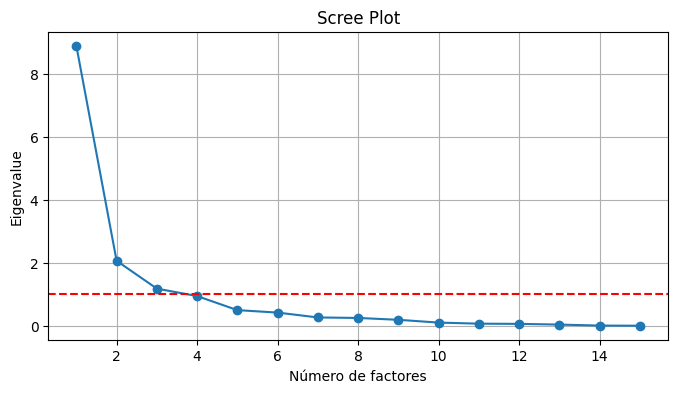

In [85]:
# 2. Determinar el número óptimo de factores usando eigenvalores
fa = FactorAnalyzer()
fa.fit(df)

# Valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Gráfica de codo (scree plot)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(ev)+1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Número de factores')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

Cargas factoriales:
                             Factor1  Factor2  Factor3
impo_planos_venezuela           0.59     0.36     0.41
02.01 LAMINA EN CALIENTE        0.78     0.25     0.41
PLANOS                          0.04     0.21     0.92
Carbón Mineral                 -0.56    -0.33     0.35
Planos de Acero al Silicio      0.34     0.52     0.38
Lámina con Recubrimiento        0.07     0.18     0.67
anglePerfilesComerciales        0.40     0.89     0.23
platePlacaDeHoja                0.18     0.93     0.28
expo_planos_ecuador             0.41     0.51    -0.01
HIERRO DE PRIMERA FUSIÓN       -0.84    -0.22     0.11
04.01 LAMINA GALVANIZADA        0.67     0.54     0.38
03.01 LAMINA EN FRIO            0.73     0.46     0.32
Arrabio                        -0.91    -0.25    -0.11
Planchón                        0.57     0.48     0.49
wBeamsPerfilesEstructurales     0.36     0.89     0.27


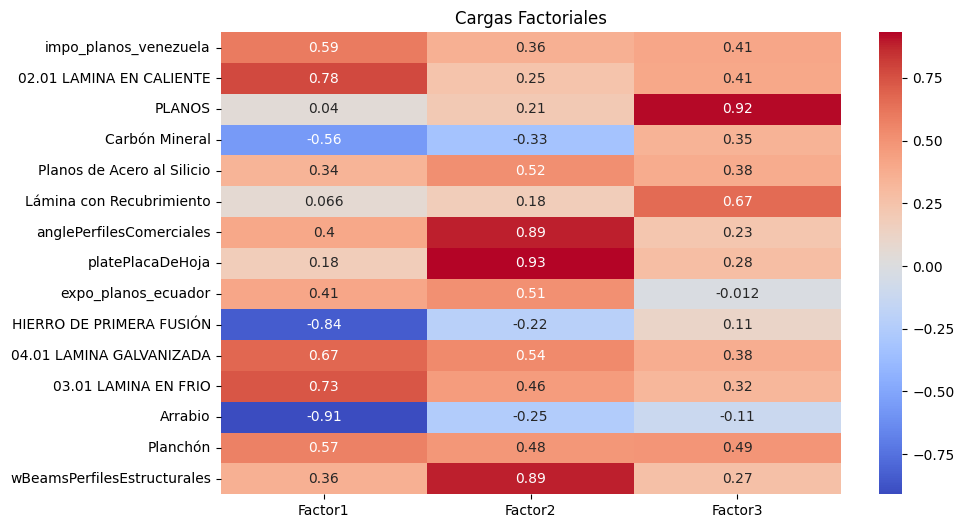

In [86]:
# 3. Ajuste del modelo con un número elegido de factores (por ejemplo, 3)
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(df)

# Carga factorial (factor loadings)
loadings = pd.DataFrame(fa.loadings_, index=df.columns, columns=[f'Factor{i+1}' for i in range(3)])
print("Cargas factoriales:")
print(loadings.round(2))

# 4. Visualización de las cargas factoriales
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title("Cargas Factoriales")
plt.show()

Analizar alch esto de arriba , igual asi de rapido yo creo que del analisis se debreia quitar las planos y lamina con recubrimiento no? , bueno igual importante decidir que vamos  a hacer para saber eso

In [ ]:
from gtda.time_series import TakensEmbedding
from gtda.metaestimators import CollectionTransformer
from gtda.diagrams import PersistenceEntropy, Scaler
from gtda.pipeline import Pipeline
from gtda.time_series import SingleTakensEmbedding
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401, required for 3D projection
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly.io as pio
from umap import UMAP

In [96]:
def fit_embedder(embedder: SingleTakensEmbedding, y: np.ndarray, verbose: bool=True) -> np.ndarray:
    """Fits a Takens embedder and displays optimal search parameters."""
    y_embedded = embedder.fit_transform(y)

    if verbose:
        print(f"Shape of embedded time series: {y_embedded.shape}")
        print(
            f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}"
        )

    return y_embedded

In [97]:
df_final2

,Fecha,impo_planos_venezuela,02.01 LAMINA EN CALIENTE,PLANOS,Carbón Mineral,Planos de Acero al Silicio,Lámina con Recubrimiento,anglePerfilesComerciales,platePlacaDeHoja,expo_planos_ecuador,HIERRO DE PRIMERA FUSIÓN,04.01 LAMINA GALVANIZADA,03.01 LAMINA EN FRIO,Arrabio,Planchón,wBeamsPerfilesEstructurales
0,2018-01,2.458102,10674,1.334947e+06,1.390474e+06,16231.399321,379223.579186,32.80,36.0625,0.064965,1.005672e+06,175,994,416118.876527,346817.522040,36.0000
1,2018-02,0.937531,7326,1.236832e+06,1.419431e+06,12262.865867,354291.919549,33.30,40.2500,0.000000,9.300972e+05,143,753,404561.530547,280760.102470,37.5625
2,2018-03,0.467958,9297,1.432077e+06,1.339079e+06,21982.874861,385708.887123,33.80,45.2000,0.066430,1.088803e+06,163,935,448736.195834,296948.464300,39.1250
3,2018-04,1.456390,7331,1.404093e+06,1.138710e+06,22098.336665,413319.697698,36.55,47.0000,0.066930,9.901302e+05,148,835,464392.357705,336959.515894,42.0000
4,2018-05,0.103295,8734,1.389706e+06,9.970485e+05,20030.682238,409209.874720,36.55,46.3125,0.030300,9.595791e+05,124,939,335999.528002,387738.621924,42.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-08,3.225389,16345,1.670717e+06,8.192972e+05,48792.109142,463122.706876,55.80,74.9000,0.294008,6.929214e+05,1099,2447,113446.081886,701043.435433,64.7500
68,2023-09,11.940596,17613,1.574722e+06,8.185817e+05,48020.459151,453312.635700,55.80,74.1250,0.212704,6.354604e+05,1059,2784,80735.725320,687164.395352,64.7500
69,2023-10,13.885897,22955,1.638523e+06,6.630554e+05,40105.087621,452186.458223,55.80,71.1000,0.353810,6.305432e+05,1350,3309,84746.996311,571398.132695,64.7500
70,2023-11,9.045534,17372,1.502094e+06,7.498532e+05,41392.083719,456068.081415,55.80,66.7500,0.160126,5.188766e+05,1575,2986,80051.629395,683119.937164,64.7500


In [116]:
max_embedding_dimension = 10
max_time_delay = 5
stride = 2

embedder_periodic = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

In [108]:
columnas_sf=list(df_final2.columns)
columnas_sf=columnas_sf[1:]
columnas_sf

['impo_planos_venezuela',
 '02.01 LAMINA EN CALIENTE',
 'PLANOS',
 'Carbón Mineral',
 'Planos de Acero al Silicio',
 'Lámina con Recubrimiento',
 'anglePerfilesComerciales',
 'platePlacaDeHoja',
 'expo_planos_ecuador',
 'HIERRO DE PRIMERA FUSIÓN',
 '04.01 LAMINA GALVANIZADA',
 '03.01 LAMINA EN FRIO',
 'Arrabio',
 'Planchón',
 'wBeamsPerfilesEstructurales']

In [147]:
""""
for col in columnas_sf:
    print(f"\nProcessing column: {col}")
    
    # Step 1: Fit and embed the time series
    y_embedded = fit_embedder(embedder_periodic, df_final2[col])

    # Step 2: Reduce to 3D using t-SNE
    tsne = TSNE(n_components=3, random_state=42, perplexity=10)
    y_tsne = tsne.fit_transform(y_embedded)

    # Step 3: Create 3D scatter plot with Plotly
    fig = go.Figure(data=[go.Scatter3d(
        x=y_tsne[:, 0],
        y=y_tsne[:, 1],
        z=y_tsne[:, 2],
        mode='markers',
        marker=dict(
            size=4,
            color=np.arange(len(y_tsne)),  # Optional: use index as color
            colorscale='Viridis',
            opacity=0.8
        ),
        text=df_final2['Fecha'].iloc[:len(y_tsne)].astype(str)  # Optional hover text
    )])

    fig.update_layout(
        title=f'3D t-SNE of Embedded Time Series: {col}',
        scene=dict(
            xaxis_title='t-SNE 1',
            yaxis_title='t-SNE 2',
            zaxis_title='t-SNE 3'
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )

    fig.show()
"""

'"\nfor col in columnas_sf:\n    print(f"\nProcessing column: {col}")\n    \n    # Step 1: Fit and embed the time series\n    y_embedded = fit_embedder(embedder_periodic, df_final2[col])\n\n    # Step 2: Reduce to 3D using t-SNE\n    tsne = TSNE(n_components=3, random_state=42, perplexity=10)\n    y_tsne = tsne.fit_transform(y_embedded)\n\n    # Step 3: Create 3D scatter plot with Plotly\n    fig = go.Figure(data=[go.Scatter3d(\n        x=y_tsne[:, 0],\n        y=y_tsne[:, 1],\n        z=y_tsne[:, 2],\n        mode=\'markers\',\n        marker=dict(\n            size=4,\n            color=np.arange(len(y_tsne)),  # Optional: use index as color\n            colorscale=\'Viridis\',\n            opacity=0.8\n        ),\n        text=df_final2[\'Fecha\'].iloc[:len(y_tsne)].astype(str)  # Optional hover text\n    )])\n\n    fig.update_layout(\n        title=f\'3D t-SNE of Embedded Time Series: {col}\',\n        scene=dict(\n            xaxis_title=\'t-SNE 1\',\n            yaxis_title=\'t-S

In [157]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import umap.umap_ as umap

reducer = umap.UMAP(n_components=3, random_state=42)

max_embedding_dimension = 5
max_time_delay = 3
stride = 1

embedder_periodic = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

# Ensure fecha is datetime
df_final2['fecha'] = pd.to_datetime(df_final2['Fecha'])

# Split dataset
df_pre = df_final2[df_final2['fecha'] < '2020-03-01']
df_covid = df_final2[(df_final2['fecha'] >= '2020-03-01') & (df_final2['fecha'] < '2022-01-01')]
df_post = df_final2[df_final2['fecha'] >= '2022-01-01']



# ------- Pre-COVID --------
for col in columnas_sf:
    print(f"\nProcessing Pre-COVID column: {col}")
    
    series = df_pre[col].dropna().values
    if len(series) < (embedder_periodic.dimension - 1) * embedder_periodic.time_delay:
        print("Not enough data")
        continue

    y_embedded = embedder_periodic.fit_transform(series)
    y_umap = reducer.fit_transform(y_embedded)

    fig = go.Figure(data=[go.Scatter3d(
        x=y_umap[:, 0],
        y=y_umap[:, 1],
        z=y_umap[:, 2],
        mode='markers',
        marker=dict(
            size=4,
            color=np.arange(len(y_umap)),
            colorscale='Viridis',
            opacity=0.8
        ),
        text=df_pre['fecha'].iloc[:len(y_umap)].astype(str)
    )])

    fig.update_layout(
        title=f'3D UMAP of Embedded Time Series (Pre-COVID): {col}',
        scene=dict(
            xaxis_title='UMAP 1',
            yaxis_title='UMAP 2',
            zaxis_title='UMAP 3'
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )
    fig.show()


Processing Pre-COVID column: impo_planos_venezuela


C:\Users\Gael\AppData\Local\Temp\ipykernel_16112\2678075773.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Gael\Documents\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.




Processing Pre-COVID column: 02.01 LAMINA EN CALIENTE



Processing Pre-COVID column: PLANOS



Processing Pre-COVID column: Carbón Mineral



Processing Pre-COVID column: Planos de Acero al Silicio



Processing Pre-COVID column: Lámina con Recubrimiento



Processing Pre-COVID column: anglePerfilesComerciales


c:\Users\Gael\Documents\Lib\site-packages\umap\umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1




Processing Pre-COVID column: platePlacaDeHoja



Processing Pre-COVID column: expo_planos_ecuador



Processing Pre-COVID column: HIERRO DE PRIMERA FUSIÓN



Processing Pre-COVID column: 04.01 LAMINA GALVANIZADA



Processing Pre-COVID column: 03.01 LAMINA EN FRIO



Processing Pre-COVID column: Arrabio



Processing Pre-COVID column: Planchón



Processing Pre-COVID column: wBeamsPerfilesEstructurales


In [153]:
# ------- COVID --------
for col in columnas_sf:
    print(f"\nProcessing COVID column: {col}")
    
    series = df_covid[col].dropna().values
    if len(series) < (embedder_periodic.dimension - 1) * embedder_periodic.time_delay:
        print("Not enough data")
        continue

    y_embedded = embedder_periodic.fit_transform(series)
    y_umap = reducer.fit_transform(y_embedded)

    fig = go.Figure(data=[go.Scatter3d(
        x=y_umap[:, 0],
        y=y_umap[:, 1],
        z=y_umap[:, 2],
        mode='markers',
        marker=dict(
            size=4,
            color=np.arange(len(y_umap)),
            colorscale='Plasma',
            opacity=0.8
        ),
        text=df_covid['fecha'].iloc[:len(y_umap)].astype(str)
    )])

    fig.update_layout(
        title=f'3D UMAP of Embedded Time Series (COVID): {col}',
        scene=dict(
            xaxis_title='UMAP 1',
            yaxis_title='UMAP 2',
            zaxis_title='UMAP 3'
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )
    fig.show()


Processing COVID column: impo_planos_venezuela



Processing COVID column: 02.01 LAMINA EN CALIENTE



Processing COVID column: PLANOS



Processing COVID column: Carbón Mineral



Processing COVID column: Planos de Acero al Silicio



Processing COVID column: Lámina con Recubrimiento



Processing COVID column: anglePerfilesComerciales


c:\Users\Gael\Documents\Lib\site-packages\umap\umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1




Processing COVID column: platePlacaDeHoja



Processing COVID column: expo_planos_ecuador



Processing COVID column: HIERRO DE PRIMERA FUSIÓN



Processing COVID column: 04.01 LAMINA GALVANIZADA



Processing COVID column: 03.01 LAMINA EN FRIO



Processing COVID column: Arrabio



Processing COVID column: Planchón



Processing COVID column: wBeamsPerfilesEstructurales


c:\Users\Gael\Documents\Lib\site-packages\umap\umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [151]:
# ------- Post-COVID --------
for col in columnas_sf:
    print(f"\nProcessing Post-COVID column: {col}")
    
    series = df_post[col].dropna().values
    if len(series) < (embedder_periodic.dimension - 1) * embedder_periodic.time_delay:
        print("Not enough data")
        continue

    y_embedded = embedder_periodic.fit_transform(series)
    y_umap = reducer.fit_transform(y_embedded)

    fig = go.Figure(data=[go.Scatter3d(
        x=y_umap[:, 0],
        y=y_umap[:, 1],
        z=y_umap[:, 2],
        mode='markers',
        marker=dict(
            size=4,
            color=np.arange(len(y_umap)),
            colorscale='Cividis',
            opacity=0.8
        ),
        text=df_post['fecha'].iloc[:len(y_umap)].astype(str)
    )])

    fig.update_layout(
        title=f'3D UMAP of Embedded Time Series (Post-COVID): {col}',
        scene=dict(
            xaxis_title='UMAP 1',
            yaxis_title='UMAP 2',
            zaxis_title='UMAP 3'
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )
    fig.show()



Processing Post-COVID column: impo_planos_venezuela



Processing Post-COVID column: 02.01 LAMINA EN CALIENTE



Processing Post-COVID column: PLANOS



Processing Post-COVID column: Carbón Mineral


c:\Users\Gael\Documents\Lib\site-packages\umap\umap_.py:2462: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1




Processing Post-COVID column: Planos de Acero al Silicio



Processing Post-COVID column: Lámina con Recubrimiento



Processing Post-COVID column: anglePerfilesComerciales



Processing Post-COVID column: platePlacaDeHoja



Processing Post-COVID column: expo_planos_ecuador



Processing Post-COVID column: HIERRO DE PRIMERA FUSIÓN



Processing Post-COVID column: 04.01 LAMINA GALVANIZADA



Processing Post-COVID column: 03.01 LAMINA EN FRIO



Processing Post-COVID column: Arrabio



Processing Post-COVID column: Planchón



Processing Post-COVID column: wBeamsPerfilesEstructurales


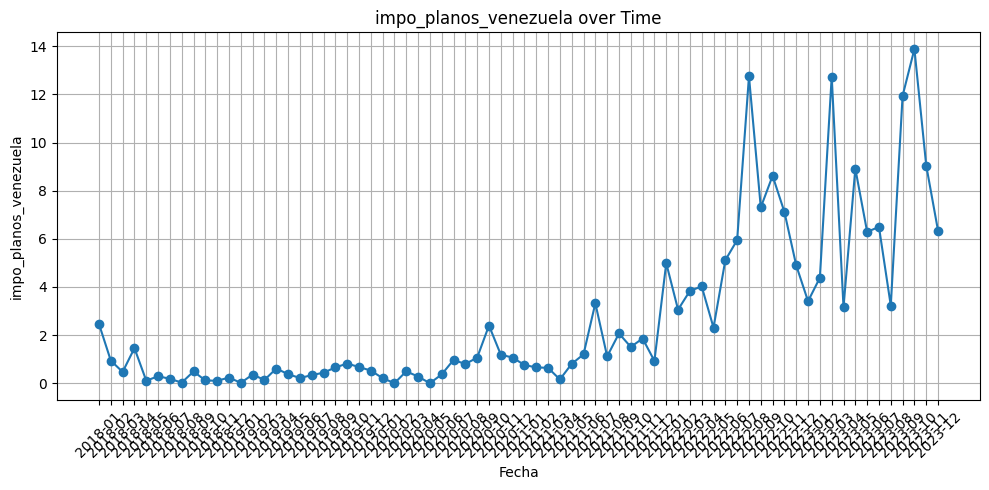

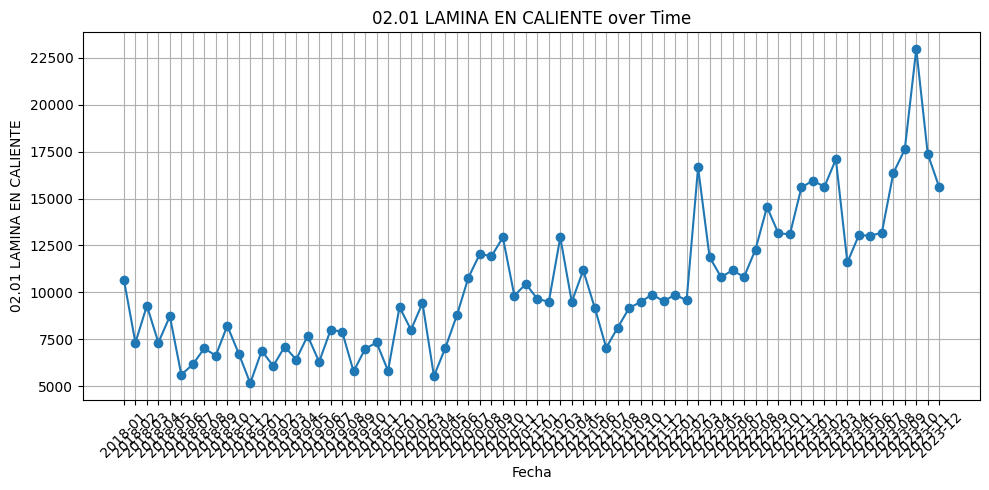

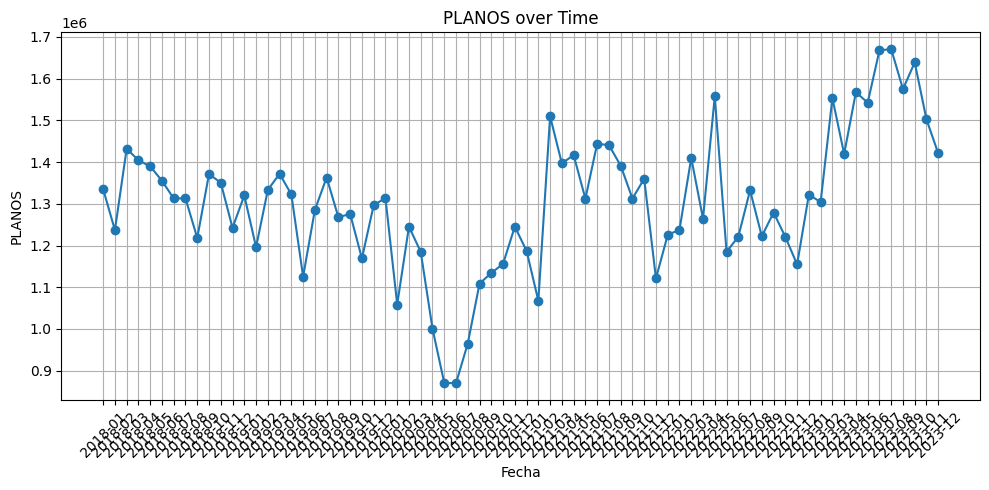

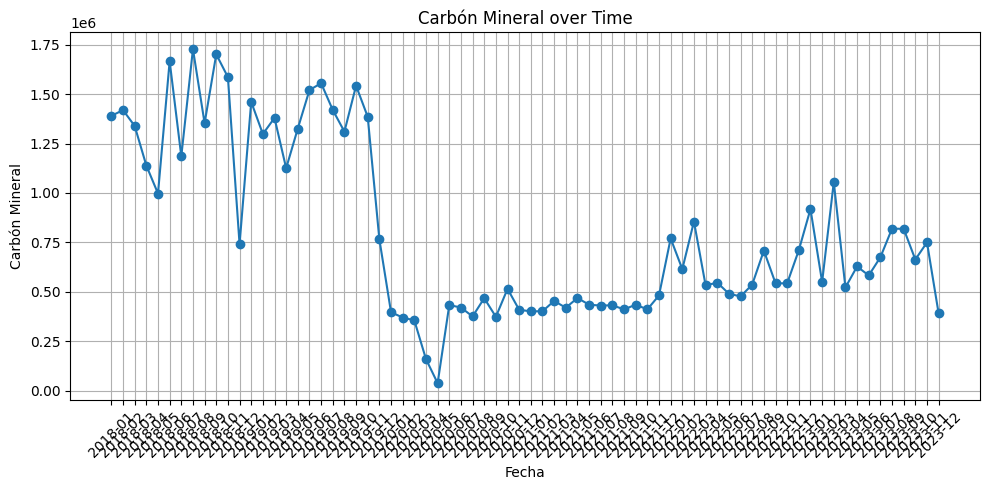

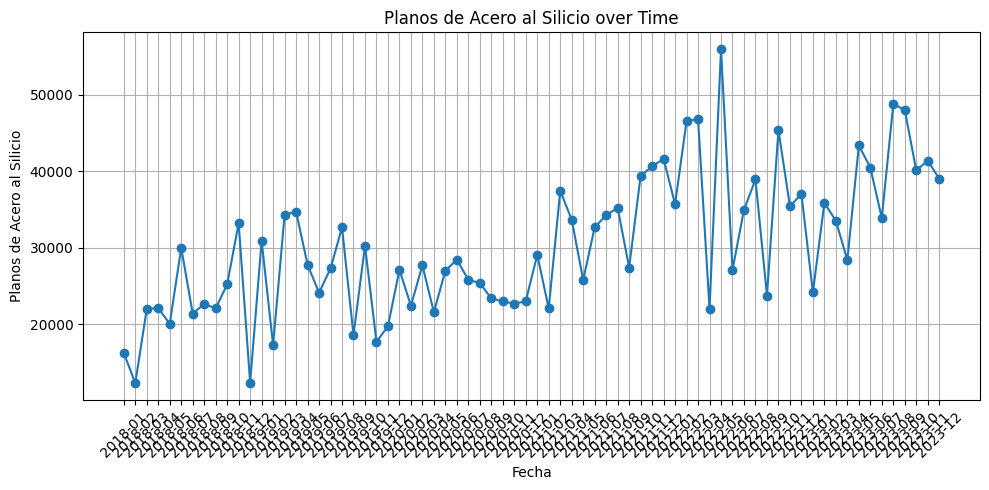

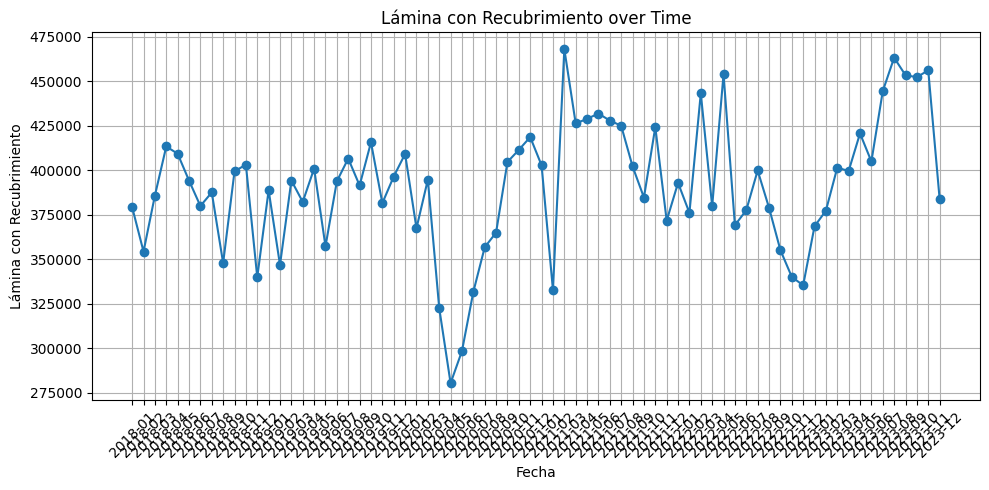

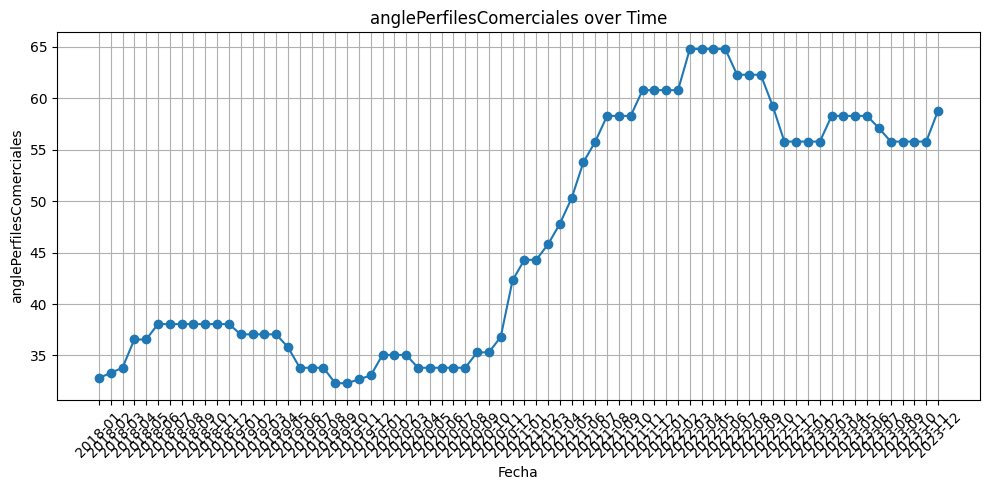

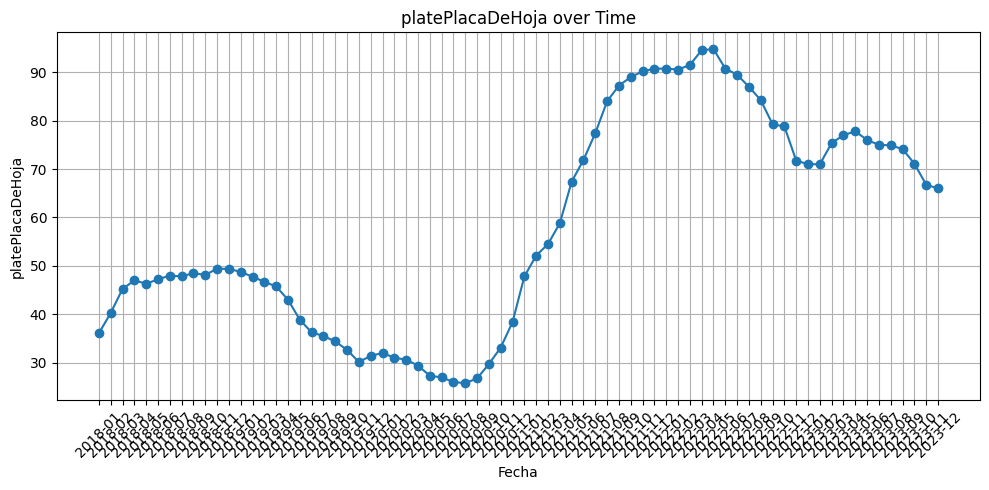

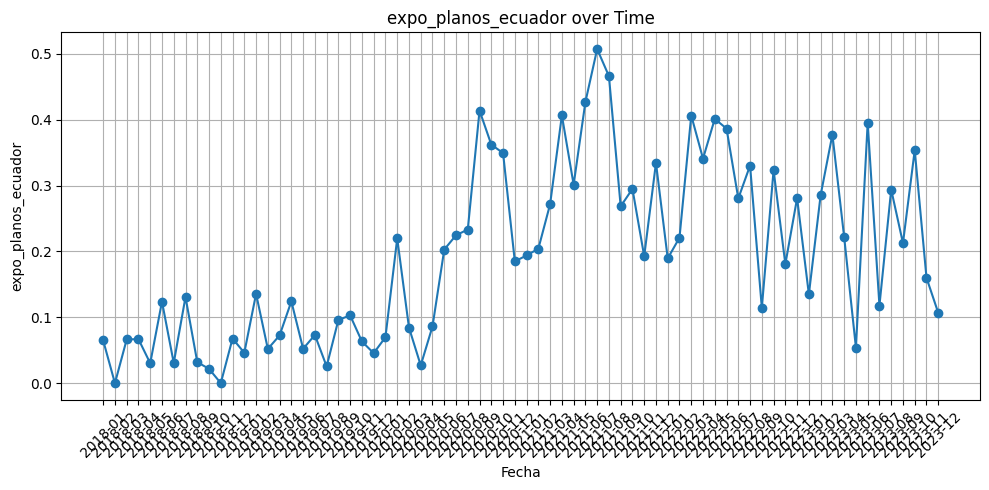

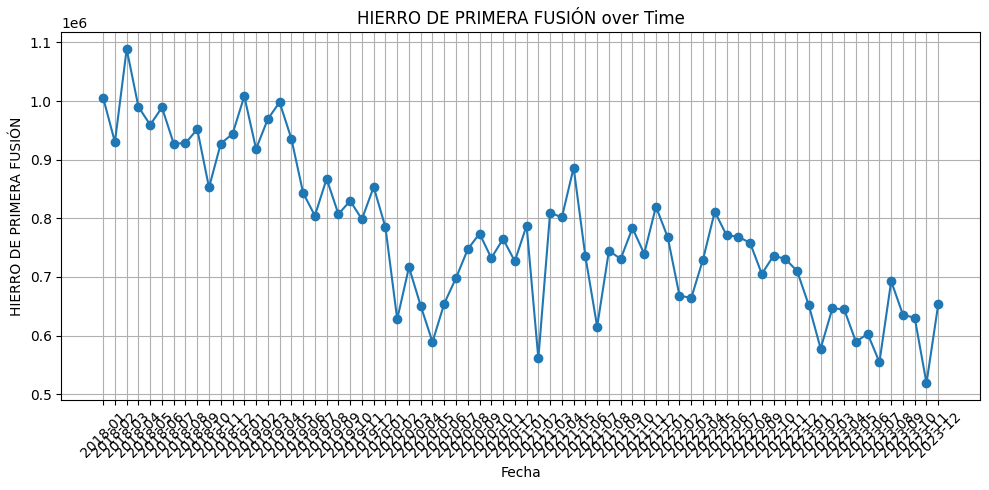

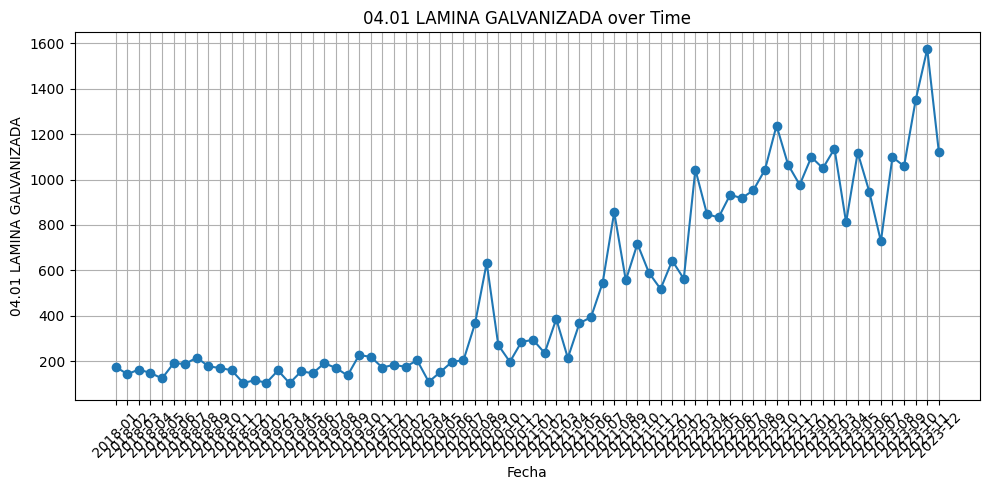

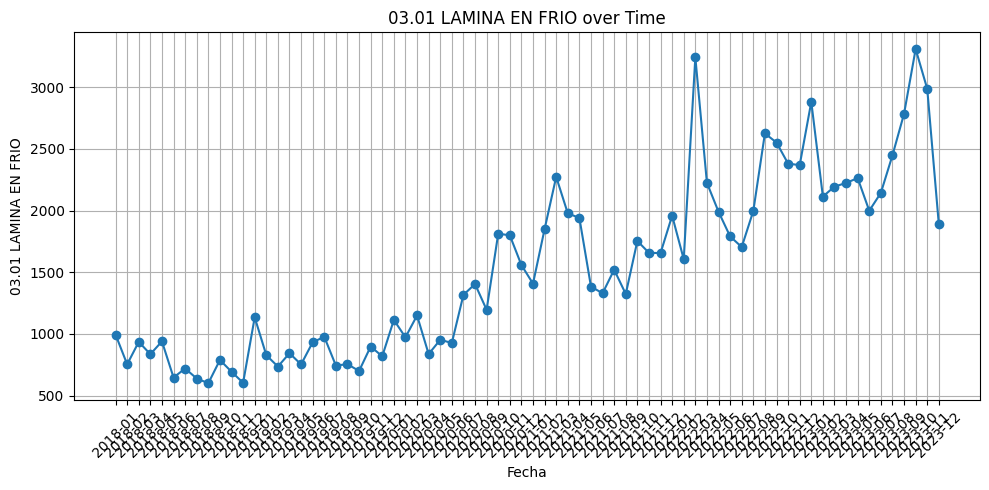

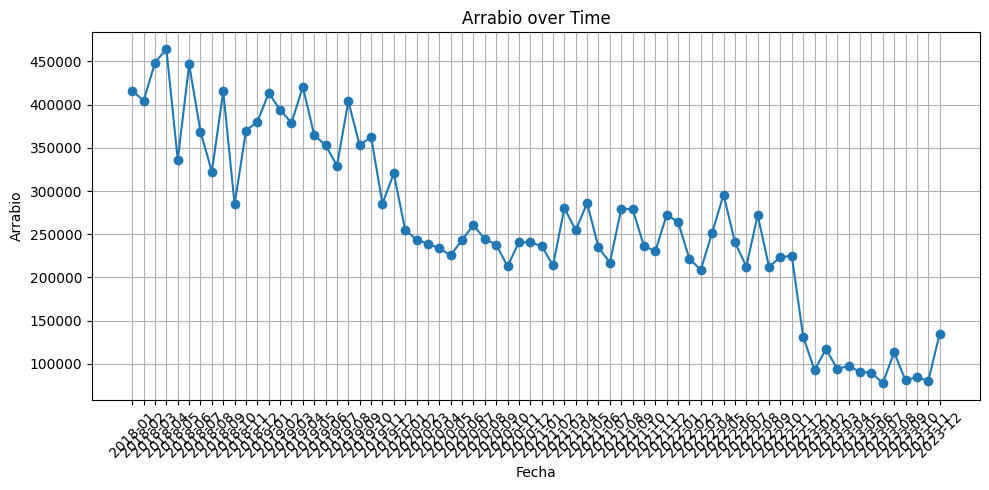

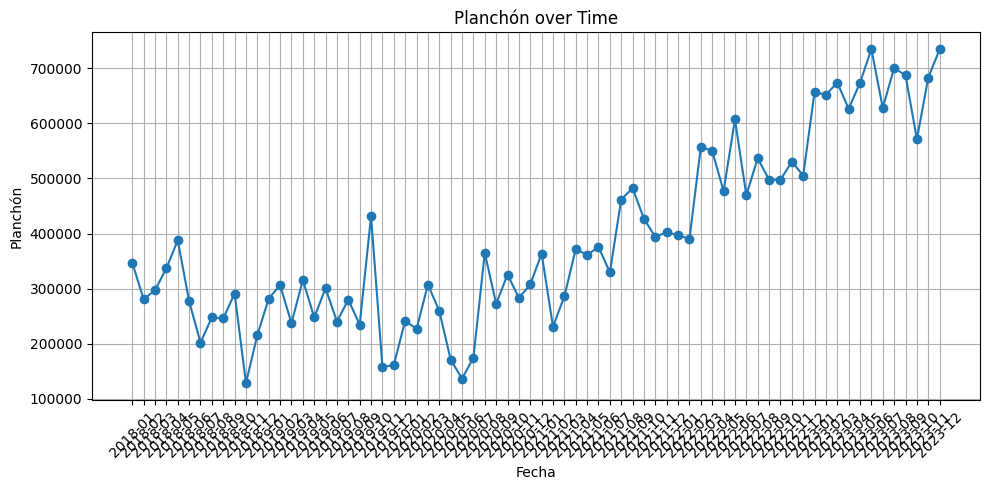

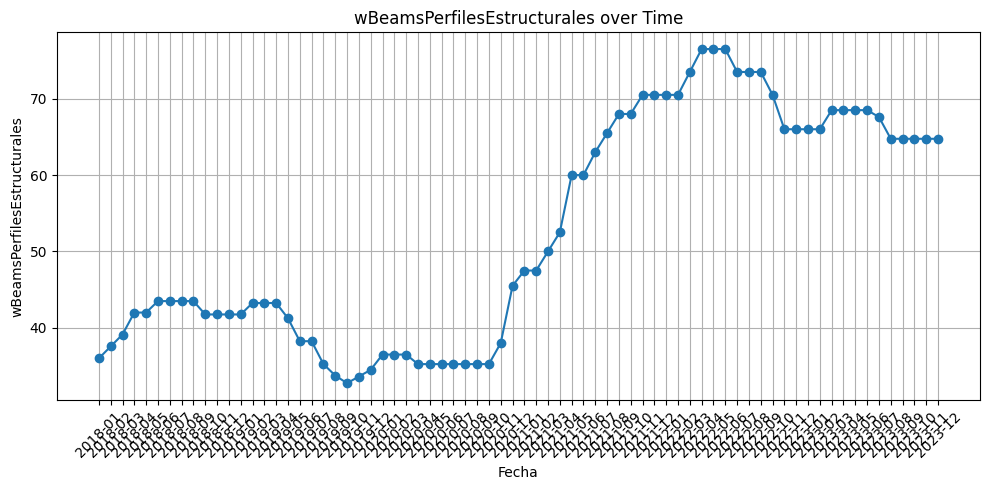

In [120]:
import matplotlib.pyplot as plt

for col in columnas_sf:
    plt.figure(figsize=(10, 5))
    plt.plot(df_final2['Fecha'], df_final2[col], marker='o', linestyle='-')
    plt.title(f'{col} over Time')
    plt.xlabel('Fecha')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



,Total,Edificación,"Agua, riego y saneamiento",Electricidad y comunicaciones,Transporte,Petróleo y petroquímica,Otras construcciones,consumo_laminados_argentina,consumo_laminados_bolivia,consumo_laminados_brasil,...,Chicago - Shredded Auto,China - Iron Ore,Monterrey - Busheling No1,01.01 PLACA DE ROLLO,01.02 PLACA DE HOJA,02.01 LAMINA EN CALIENTE,03.01 LAMINA EN FRIO,04.01 LAMINA GALVANIZADA,05.01 PERFILES ESTRUCTURALES,06.01 PERFILES COMERCIALES
7,-2.8,-0.2,-6.3,0.1,-4.9,-18.2,-2.2,439.979833,67.420775,1952.000,...,350.0,71.306000,331.875,10297,1714,7024,638,216,11155,3352
8,1.0,1.4,6.7,6.7,-3.8,11.5,4.4,383.169833,51.328120,1899.000,...,325.0,74.237000,320.000,9435,2143,6637,600,177,8742,2989
9,0.1,-3.9,4.6,10.9,5.3,5.5,0.2,363.139833,69.975973,1774.000,...,335.0,77.331739,302.500,11917,2455,8227,788,170,9328,3152
10,-3.7,-1.5,-12.5,-1.1,-4.8,-8.7,-8.7,356.468833,67.820673,1761.000,...,355.0,75.965238,300.625,11528,1493,6745,693,160,8760,2733
11,0.7,2.5,15.6,5.6,-3.3,5.5,-4.1,270.147833,68.371437,1580.000,...,355.0,71.997000,310.000,10055,1613,5171,603,104,9364,2803
12,2.1,4.3,-19.0,-3.8,2.1,1.2,2.9,312.133417,80.801337,1617.662,...,325.0,76.958182,309.000,9795,1708,6897,1134,116,10395,3583
13,-0.6,1.3,13.6,-5.9,-2.5,4.1,-7.9,227.035417,72.403384,1697.527,...,325.0,88.321111,306.250,9077,1497,6086,827,105,8304,3115
14,-2.7,-2.8,-13.4,4.5,-2.6,10.2,-1.4,343.585417,50.268891,1839.706,...,345.0,88.231905,301.250,11277,2175,7115,735,159,8762,3420
15,-1.6,-1.3,-4.2,-5.0,-0.1,-8.2,-1.7,392.038417,48.919038,1719.781,...,322.0,96.061429,305.000,9379,2180,6430,843,103,7990,2718
16,1.2,-0.9,4.3,-5.1,2.9,12.3,-1.0,364.254417,59.971373,1790.101,...,292.0,103.123333,276.875,10557,2211,7694,752,155,9488,4059
